In [1]:
import matplotlib.pyplot as plt
import numpy as np
from rich.progress import track

%load_ext lab_black
%load_ext watermark

# Metropolis-Hastings Example 1

Adapted from [Codes for Unit 5: norcaumet.m](https://www2.isye.gatech.edu/isye6420/supporting.html).

Associated lecture video: Unit 5 Lesson 7

Let $f(x)$ be proportional to the target pdf. $x_j$ is the current value and $q(x|x_j)$ is a proposal distribution.
1. Sample $x_* ∼ q(x|x_j)$.
2. Calculate the acceptance probability: 
$ρ(x_j, x_*) = min\left\{1, \frac{f(x_*)}{f(x_j)}\frac{q(x_j|x_*)}{q(x_*|x_j)}\right\}$
3. Update $x_{j+1} = x_*$ with probability $ρ(x_j, x_*)$, otherwise $x_{j+1}$ remains equal to $x_j$.

There are different variations on the algorithm. They differ when calculating $ρ$.
- Random-walk Metropolis:
  - If $q$ is symmetric, then you can simplify the acceptance probability to $ρ(x_j, x_*) = min\left\{1, \frac{f(x_*)}{f(x_j)}\right\}$
- Independent Metropolis-Hastings:
  - If $q$ is independent, then the acceptance probability is $ρ(x_j, x_*) = min\left\{1, \frac{f(x_*)}{f(x_j)}\frac{q(x_j)}{q(x_*)}\right\}$

For this example:

$X|\theta~\sim{N}(\theta, 1)$ and $\theta~\sim {\rm Cauchy}(0, 1)$

Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

np.mean(thetas)=1.2827681725807567
np.var(thetas)=0.8634250986236365


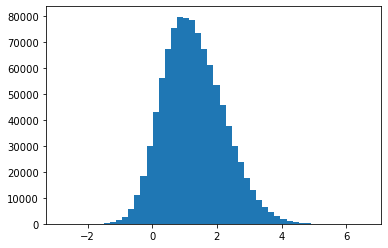

In [2]:
rng = np.random.default_rng(1)

n = 1000000  # observations
burn = 500
theta = 1  # init
thetas = np.zeros(n)
x = 2  # observed

# generating necessary randoms as arrays is faster
theta_prop = rng.standard_normal(n) + x
unif = rng.uniform(size=n)

for i in track(range(n)):
    r = (1 + theta**2) / (1 + theta_prop[i] ** 2)
    rho = min(r, 1)
    if unif[i] < rho:
        theta = theta_prop[i]

    thetas[i] = theta

thetas = thetas[burn:]

print(f"{np.mean(thetas)=}")
print(f"{np.var(thetas)=}")

plt.hist(thetas, 50)
plt.show()

In [3]:
%watermark --iversions -v

Python implementation: CPython
Python version       : 3.10.4
IPython version      : 8.4.0

matplotlib: 3.5.2
numpy     : 1.22.4

